# logsitics regression 解决简单的数据分类问题

## logistics 工作原理

* 每个回归系数初始化为 1
* 重复 R 次:
 *    计算整个数据集的梯度
 * 使用 步长 x 梯度 更新回归系数的向量
* 返回回归系数

## logistics 开发流程

* 收集数据: 采用任意方法收集数据
* 准备数据: 由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳。
* 分析数据: 采用任意方法对数据进行分析。
* 训练算法: 大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数。
* 测试算法: 一旦训练步骤完成，分类将会很快。
* 使用算法: 首先，我们需要输入一些数据，并将其转换成对应的结构化数值；接着，基于训练好的回归系数就可以对*这些数值进行简单的回归计算，判定它们属于哪个类别；在这之后，我们就可以在输出的类别上做一些其他分析工作。

## logistics regression 算法特点

* 优点: 计算代价不高，易于理解和实现。
* 缺点: 容易欠拟合，分类精度可能不高。
* 适用数据类型: 数值型和标称型数据。

In [1]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Project: logistics regression
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
def loadDataSet():
    filename = 'testSet.txt'
    data = pd.read_csv(filename, sep='\t', encoding='gbk', header=None)
    data['x0'] = 1
    data = data.reindex(columns=['x0', 0, 1, 2])
    #print(data)
    dataSet = data.iloc[:,:-1]
    labels = data.iloc[:,-1:]
    
    print('_____________________________data info________________________________')
    print(data.info())
    print('_____________________________data describe____________________________')
    print(data.describe())
    return np.mat(dataSet), labels[2].tolist()
loadDataSet()

_____________________________data info________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
x0    100 non-null int64
0     100 non-null float64
1     100 non-null float64
2     100 non-null int64
dtypes: float64(2), int64(2)
memory usage: 3.2 KB
None
_____________________________data describe____________________________
          x0           0           1           2
count  100.0  100.000000  100.000000  100.000000
mean     1.0    0.030012    6.576110    0.530000
std      0.0    1.170337    4.644942    0.501614
min      1.0   -3.642001   -3.181888    0.000000
25%      1.0   -0.790164    2.828881    0.000000
50%      1.0    0.083975    6.893569    1.000000
75%      1.0    0.834009   10.458066    1.000000
max      1.0    3.010150   14.739025    1.000000


(matrix([[  1.00000000e+00,  -1.76120000e-02,   1.40530640e+01],
         [  1.00000000e+00,  -1.39563400e+00,   4.66254100e+00],
         [  1.00000000e+00,  -7.52157000e-01,   6.53862000e+00],
         [  1.00000000e+00,  -1.32237100e+00,   7.15285300e+00],
         [  1.00000000e+00,   4.23363000e-01,   1.10546770e+01],
         [  1.00000000e+00,   4.06704000e-01,   7.06733500e+00],
         [  1.00000000e+00,   6.67394000e-01,   1.27414520e+01],
         [  1.00000000e+00,  -2.46015000e+00,   6.86680500e+00],
         [  1.00000000e+00,   5.69411000e-01,   9.54875500e+00],
         [  1.00000000e+00,  -2.66320000e-02,   1.04277430e+01],
         [  1.00000000e+00,   8.50433000e-01,   6.92033400e+00],
         [  1.00000000e+00,   1.34718300e+00,   1.31755000e+01],
         [  1.00000000e+00,   1.17681300e+00,   3.16702000e+00],
         [  1.00000000e+00,  -1.78187100e+00,   9.09795300e+00],
         [  1.00000000e+00,  -5.66606000e-01,   5.74900300e+00],
         [  1.00000000e+0

### 项目概述:

#### 在一个简单的数据集上，采用梯度上升法找到 Logistic 回归分类器在此数据集上的最佳回归系数

### 开发流程

#### 收集数据：可以使用任何方式
#### 准备数据：由于需要进行距离计算，因此要求数据类型为数值型 （结构化数据为佳）
#### 分析数据：画出决策边界
#### 训练算法：使用梯度上升找到最佳参数
#### 测试算法：使用logistics回归进分类
#### 使用算法：对简单数据集中数据进行分类

In [3]:
dataSet, labels = loadDataSet()
print('dataSet\n', dataSet)
np.shape(dataSet)

_____________________________data info________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
x0    100 non-null int64
0     100 non-null float64
1     100 non-null float64
2     100 non-null int64
dtypes: float64(2), int64(2)
memory usage: 3.2 KB
None
_____________________________data describe____________________________
          x0           0           1           2
count  100.0  100.000000  100.000000  100.000000
mean     1.0    0.030012    6.576110    0.530000
std      0.0    1.170337    4.644942    0.501614
min      1.0   -3.642001   -3.181888    0.000000
25%      1.0   -0.790164    2.828881    0.000000
50%      1.0    0.083975    6.893569    1.000000
75%      1.0    0.834009   10.458066    1.000000
max      1.0    3.010150   14.739025    1.000000
dataSet
 [[  1.00000000e+00  -1.76120000e-02   1.40530640e+01]
 [  1.00000000e+00  -1.39563400e+00   4.66254100e+00]
 [  1.00000000e+00  -7.52157000e-01   

(100, 3)

In [4]:
def plotBestFit(dataSet, labels, weights):
    x1, y1 = [], []
    x2, y2 = [], []
    for i in range(len(labels)):
        if int(labels[i]) == 1:
            x1.append(dataSet[i, 1])
            y1.append(dataSet[i, 2])
        else:
            x2.append(dataSet[i, 1])
            y2.append(dataSet[i, 2])

    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    ax.scatter(x1, y1, c='red', marker='s', alpha=0.5, label='class1')
    ax.scatter(x2, y2, c='green', alpha=0.5, label='class0')
    ax.legend(loc='upper left', fontsize=20)
    x = np.linspace(start=-3, stop=3, num=1000)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X'); plt.ylabel('Y')
    plt.show()

In [5]:
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

def gradAscent(dataMatIn, classLables):
    dataMatrix = np.mat(dataMatIn)
    print(dataMatrix)
    labelMatrix = np.mat(classLables).transpose() # 转化为列向量
    m, n = np.shape(dataMatrix)
    print(m, n)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n, 1))
    print(weights)
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (labelMatrix - h)
        weights = weights + alpha * dataMatrix.transpose() * error
    return np.array(weights)
gradAscent(dataSet, labels)

[[  1.00000000e+00  -1.76120000e-02   1.40530640e+01]
 [  1.00000000e+00  -1.39563400e+00   4.66254100e+00]
 [  1.00000000e+00  -7.52157000e-01   6.53862000e+00]
 [  1.00000000e+00  -1.32237100e+00   7.15285300e+00]
 [  1.00000000e+00   4.23363000e-01   1.10546770e+01]
 [  1.00000000e+00   4.06704000e-01   7.06733500e+00]
 [  1.00000000e+00   6.67394000e-01   1.27414520e+01]
 [  1.00000000e+00  -2.46015000e+00   6.86680500e+00]
 [  1.00000000e+00   5.69411000e-01   9.54875500e+00]
 [  1.00000000e+00  -2.66320000e-02   1.04277430e+01]
 [  1.00000000e+00   8.50433000e-01   6.92033400e+00]
 [  1.00000000e+00   1.34718300e+00   1.31755000e+01]
 [  1.00000000e+00   1.17681300e+00   3.16702000e+00]
 [  1.00000000e+00  -1.78187100e+00   9.09795300e+00]
 [  1.00000000e+00  -5.66606000e-01   5.74900300e+00]
 [  1.00000000e+00   9.31635000e-01   1.58950500e+00]
 [  1.00000000e+00  -2.42050000e-02   6.15182300e+00]
 [  1.00000000e+00  -3.64530000e-02   2.69098800e+00]
 [  1.00000000e+00  -1.96949

array([[ 4.12414349],
       [ 0.48007329],
       [-0.6168482 ]])

_____________________________data info________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
x0    100 non-null int64
0     100 non-null float64
1     100 non-null float64
2     100 non-null int64
dtypes: float64(2), int64(2)
memory usage: 3.2 KB
None
_____________________________data describe____________________________
          x0           0           1           2
count  100.0  100.000000  100.000000  100.000000
mean     1.0    0.030012    6.576110    0.530000
std      0.0    1.170337    4.644942    0.501614
min      1.0   -3.642001   -3.181888    0.000000
25%      1.0   -0.790164    2.828881    0.000000
50%      1.0    0.083975    6.893569    1.000000
75%      1.0    0.834009   10.458066    1.000000
max      1.0    3.010150   14.739025    1.000000
[[  1.00000000e+00  -1.76120000e-02   1.40530640e+01]
 [  1.00000000e+00  -1.39563400e+00   4.66254100e+00]
 [  1.00000000e+00  -7.52157000e-01   6.5386200

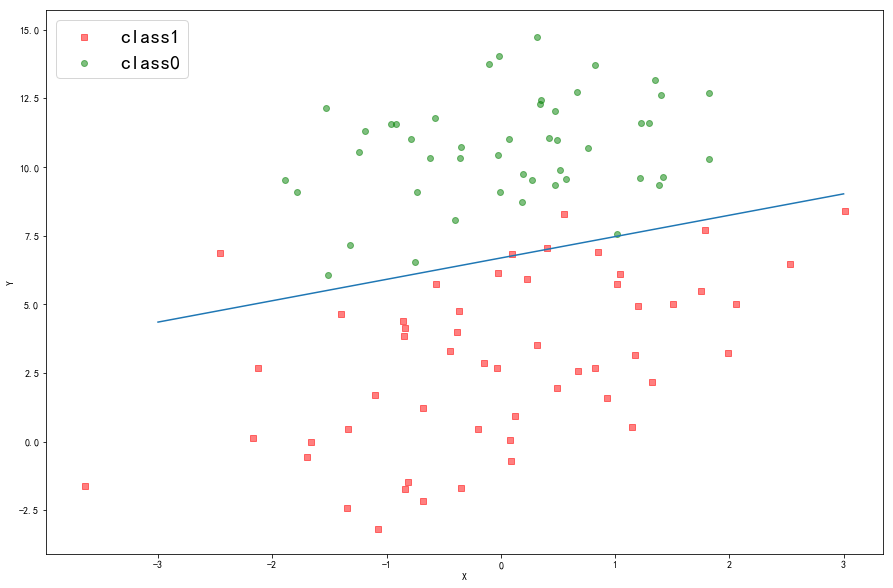

In [6]:
def testLR():
    # 1.收集并准备数据
    dataMat, labelMat = loadDataSet()

    # print dataMat, '---\n', labelMat
    # 2.训练模型，  f(x)=a1*x1+b2*x2+..+nn*xn中 (a1,b2, .., nn).T的矩阵值
    # 因为数组没有是复制n份， array的乘法就是乘法
    dataArr = np.array(dataMat)
    # print dataArr
    weights = gradAscent(dataArr, labelMat)
    # weights = stocGradAscent0(dataArr, labelMat)
    # weights = stocGradAscent1(dataArr, labelMat)
    # print '*'*30, weights

    # 数据可视化
    plotBestFit(dataArr, labelMat, weights)
testLR()

### 注意

#### 梯度上升算法在每次更新回归系数时都需要遍历整个数据集，该方法在处理 100 个左右的数据集时尚可，但如果有数十亿样本和成千上万的特征，那么该方法的计算复杂度就太高了。一种改进方法是一次仅用一个样本点来更新回归系数，该方法称为 随机梯度上升算法。由于可以在新样本到来时对分类器进行增量式更新，因而随机梯度上升算法是一个在线学习(online learning)算法。与 “在线学习” 相对应，一次处理所有数据被称作是 “批处理” （batch） 。

### 随机梯度上升算法可以写成如下的伪代码:

* 所有回归系数初始化为 1
* 对数据集中每个样本
 *    计算该样本的梯度
 *    使用 alpha x gradient 更新回归系数值
* 返回回归系数值

In [32]:
def sigmoid(inX):
    return 1/(1+np.exp(-inX))

def gradAscent(data, labels):
    m, n = np.shape(data)
    dataMatrix = np.mat(data)
    labelMatrix = np.mat(labels).transpose()
    weights = np.ones((n, 1))
    alpha = 0.0001
    maxCycles = 500
    for i in range(maxCycles):
        h = sigmoid(weights*dataMatrix)
        error = (labelMatrix - h)
        weights = weights + alpha * dataMatrix.transpose() * error
    return np.array(weigthts)

# 改进为随机梯度上升法
# 随机梯度上升
# 梯度上升优化算法在每次更新数据集时都需要遍历整个数据集，计算复杂都较高
# 随机梯度上升一次只用一个样本点来更新回归系数
def stocGradAscent0(dataMatrix, classLabels):
    m,n = np.shape(dataMatrix)
    print('m, n', m, n)
    alpha = 0.01
    # n*1的矩阵
    # 函数ones创建一个全1的数组
    weights = np.ones(n)   # 初始化长度为n的数组，元素全部为 1
    print('dataMatrix shape', np.shape(dataMatrix[0]), dataMatrix[0])
    for i in range(m):
        # sum(dataMatrix[i]*weights)为了求 f(x)的值， f(x)=a1*x1+b2*x2+..+nn*xn,此处求出的 h 是一个具体的数值，而不是一个矩阵
        h = sigmoid(sum(dataMatrix[i]*weights))
        # print 'dataMatrix[i]===', dataMatrix[i]
        # 计算真实类别与预测类别之间的差值，然后按照该差值调整回归系数
        error = classLabels[i] - h
        # 0.01*(1*1)*(1*n)
        #print weights, "*"*10 , dataMatrix[i], "*"*10 , error
        weights = weights + alpha * error * dataMatrix[i]
    return weights

![image.png](attachment:image.png)

#### 改进随机梯度上升法

In [41]:
# 随机梯度上升算法（随机化）
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = np.shape(dataMatrix)
    print('m, n', m, n)
    weights = np.ones(n)   # 创建与列数相同的矩阵的系数矩阵，所有的元素都是1
    # 随机梯度, 循环150,观察是否收敛
    print(dataMatrix[0])
    print(np.shape(dataMatrix[0]))
    for j in range(numIter):
        # [0, 1, 2 .. m-1]
        dataIndex = list(range(m))
        for i in range(m):
            # i和j的不断增大，导致alpha的值不断减少，但是不为0
            alpha = 4/(1.0+j+i)+0.0001    # alpha 会随着迭代不断减小，但永远不会减小到0，因为后边还有一个常数项0.0001
            # 随机产生一个 0～len()之间的一个值
            # random.uniform(x, y) 方法将随机生成下一个实数，它在[x,y]范围内,x是这个范围内的最小值，y是这个范围内的最大值。
            randIndex = int(np.random.randint(0,len(dataIndex)))
            # sum(dataMatrix[i]*weights)为了求 f(x)的值， f(x)=a1*x1+b2*x2+..+nn*xn
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            # print weights, '__h=%s' % h, '__'*20, alpha, '__'*20, error, '__'*20, dataMatrix[randIndex]
            
            weights = weights + alpha * error * dataMatrix[randIndex]
            del dataIndex[randIndex]
    return weights


_____________________________data info________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
x0    100 non-null int64
0     100 non-null float64
1     100 non-null float64
2     100 non-null int64
dtypes: float64(2), int64(2)
memory usage: 3.2 KB
None
_____________________________data describe____________________________
          x0           0           1           2
count  100.0  100.000000  100.000000  100.000000
mean     1.0    0.030012    6.576110    0.530000
std      0.0    1.170337    4.644942    0.501614
min      1.0   -3.642001   -3.181888    0.000000
25%      1.0   -0.790164    2.828881    0.000000
50%      1.0    0.083975    6.893569    1.000000
75%      1.0    0.834009   10.458066    1.000000
max      1.0    3.010150   14.739025    1.000000
m, n 100 3
[  1.        -0.017612  14.053064]
(3,)


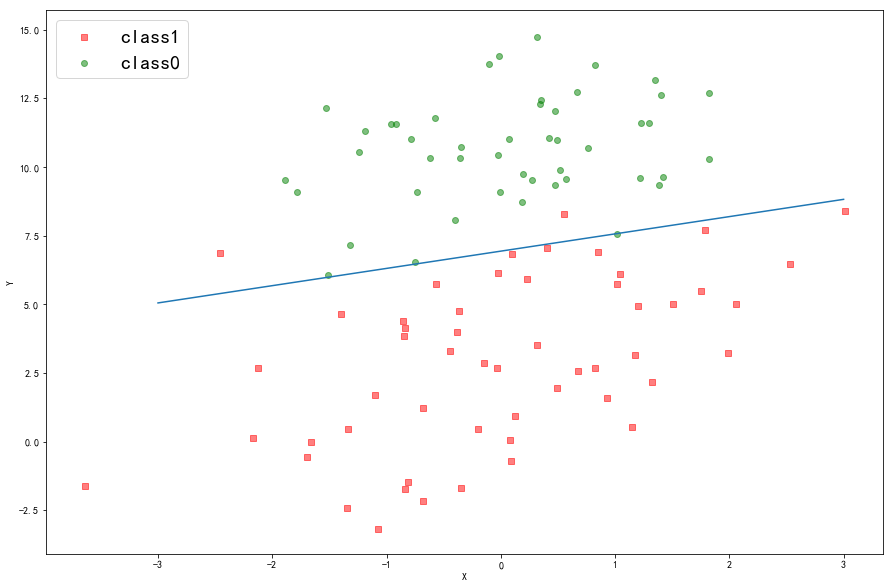

In [42]:
def testLR():
    # 1.收集并准备数据
    dataMat, labelMat = loadDataSet()

    # print dataMat, '---\n', labelMat
    # 2.训练模型，  f(x)=a1*x1+b2*x2+..+nn*xn中 (a1,b2, .., nn).T的矩阵值
    # 因为数组没有是复制n份， array的乘法就是乘法
    dataArr = np.array(dataMat)
    # print dataArr
    weights = stocGradAscent1(dataArr, labelMat)
    #weights = stocGradAscent0(dataArr, labelMat)
    # weights = stocGradAscent1(dataArr, labelMat)
    # print '*'*30, weights

    # 数据可视化
    plotBestFit(dataArr, labelMat, weights)
testLR()

#### 上面的改进版随机梯度上升算法，我们修改了两处代码。

#### 第一处改进为 alpha 的值。alpha 在每次迭代的时候都会调整，这回缓解上面波动图的数据波动或者高频波动。另外，虽然 alpha 会随着迭代次数不断减少，但永远不会减小到 0，因为我们在计算公式中添加了一个常数项。

#### 第二处修改为 randIndex 更新，这里通过随机选取样本拉来更新回归系数。这种方法将减少周期性的波动。这种方法每次随机从列表中选出一个值，然后从列表中删掉该值（再进行下一次迭代）。